
# Predicting Residential Property Prices Using Advanced Regression Techniques.
---



### Setup: Google Drive + ZIP Extraction


#### Mount Drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Unzip dataset.

In [2]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/house-prices-advanced-regression-techniques.zip"
extract_path = "/content/house_prices"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

os.listdir(extract_path)

['data_description.txt', 'train.csv', 'test.csv', 'sample_submission.csv']

### 1. Data Loading.

In [3]:
import pandas as pd

train_path = os.path.join(extract_path, "train.csv")
test_path = os.path.join(extract_path, "test.csv")

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print(train_df.shape, test_df.shape)
train_df.head()

(1460, 81) (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 2. Data Understanding

In [4]:
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Target Variable Distribution.

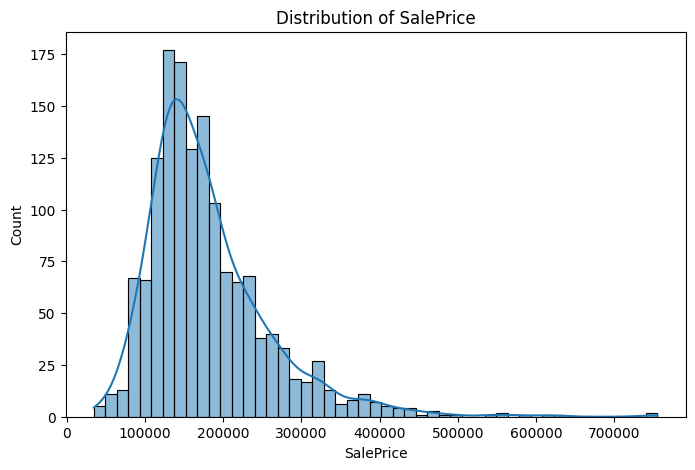

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")
plt.show()

#### Correlation Heatmap (Top Features).

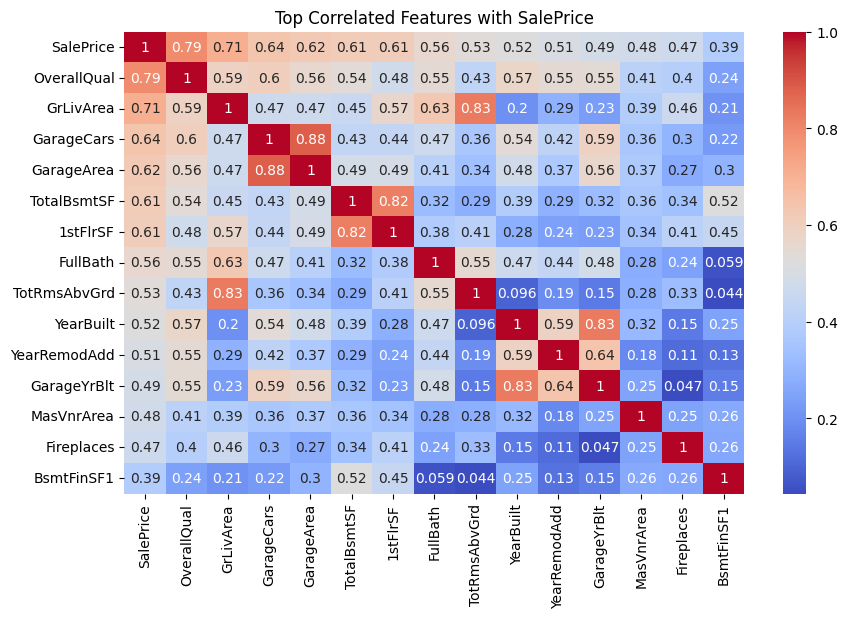

In [6]:
corr = train_df.corr(numeric_only=True)
top_corr = corr['SalePrice'].sort_values(ascending=False)[:15]

plt.figure(figsize=(10,6))
sns.heatmap(train_df[top_corr.index].corr(), annot=True, cmap='coolwarm')
plt.title("Top Correlated Features with SalePrice")
plt.show()

### 3. Data Preprocessing.

#### Separate Target.

In [7]:
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

#### Missing Values.

In [8]:
missing = X.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


#### Basic Imputation Strategy

In [9]:
from sklearn.impute import SimpleImputer

num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

X[num_cols] = num_imputer.fit_transform(X[num_cols])
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

### 4. Encoding Categorical Variables

In [10]:
from sklearn.preprocessing import OneHotEncoder

X = pd.get_dummies(X, drop_first=True)

In [11]:
# Apply same transformation to test data:

test_df[num_cols] = num_imputer.transform(test_df[num_cols])
test_df[cat_cols] = cat_imputer.transform(test_df[cat_cols])

test_df = pd.get_dummies(test_df, drop_first=True)

X, test_df = X.align(test_df, join='left', axis=1, fill_value=0)

### 5. Exploratory Data Analysis.

#### Target Variable Analysis.

Distribution

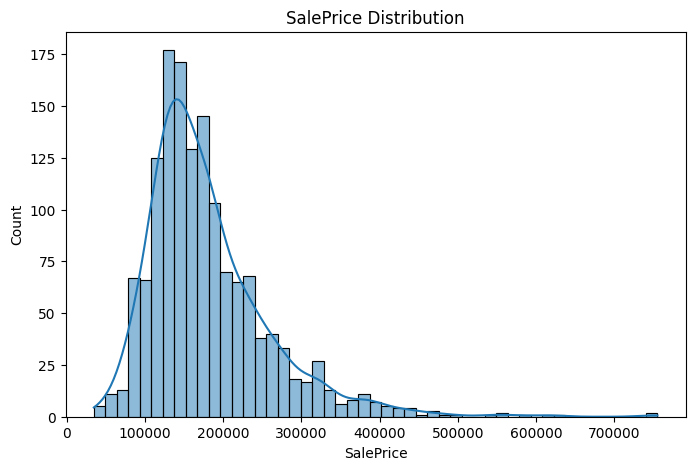

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(y, kde=True)
plt.title("SalePrice Distribution")
plt.show()

Boxplot (Outliers)

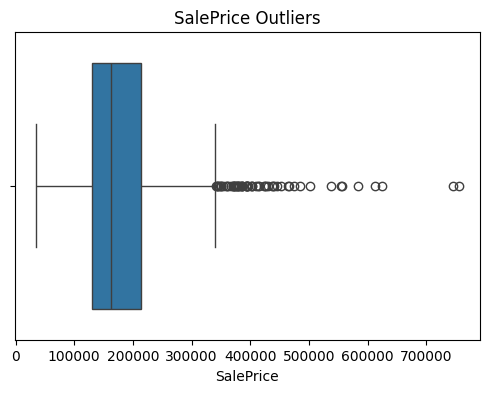

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x=y)
plt.title("SalePrice Outliers")
plt.show()

Log Transformation Insight.

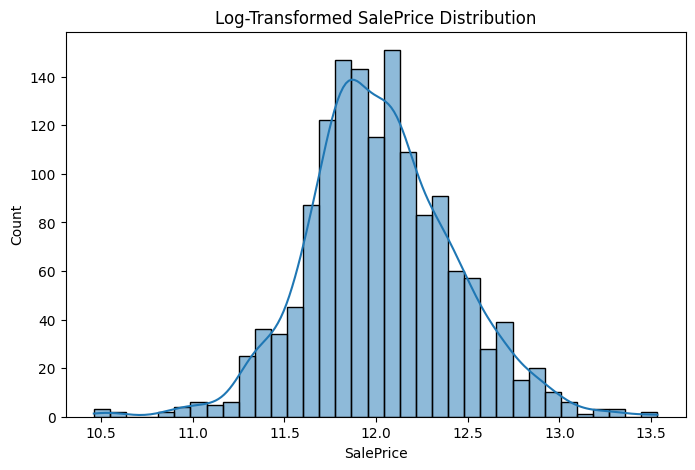

In [14]:
import numpy as np

y_log = np.log1p(y)

plt.figure(figsize=(8,5))
sns.histplot(y_log, kde=True)
plt.title("Log-Transformed SalePrice Distribution")
plt.show()

Log transformation makes the target more normally distributed, which benefits linear models and stabilizes variance.

Numerical Features vs SalePrice
Top correlated numerical features.

In [15]:
corr = train_df.corr(numeric_only=True)['SalePrice']\
               .sort_values(ascending=False)

top_num_features = corr[1:11].index
top_num_features

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')

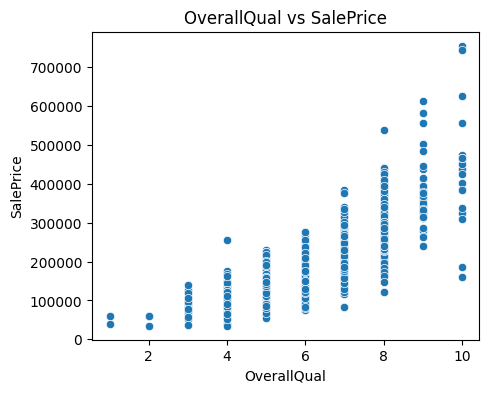

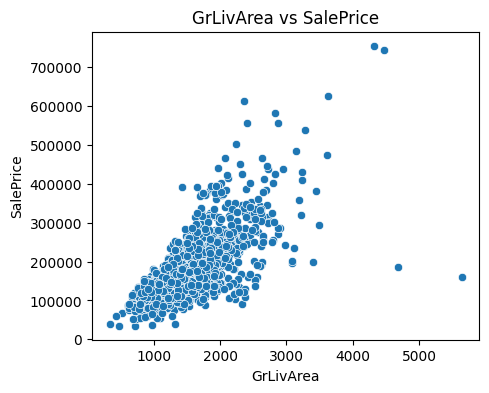

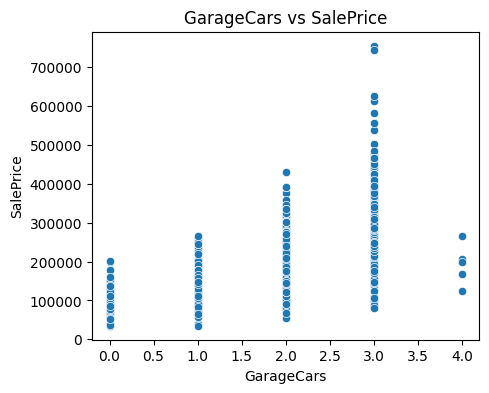

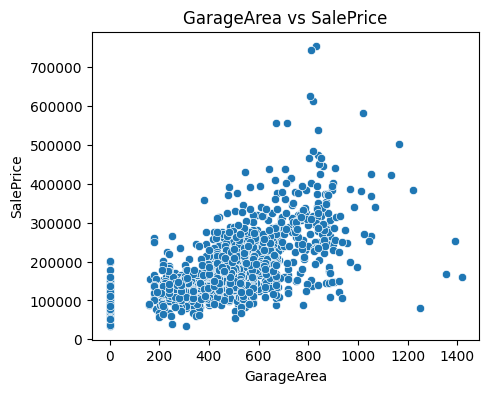

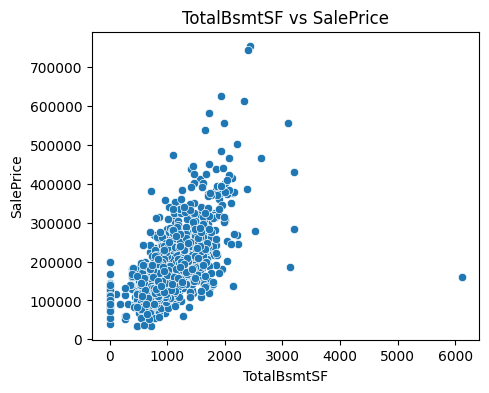

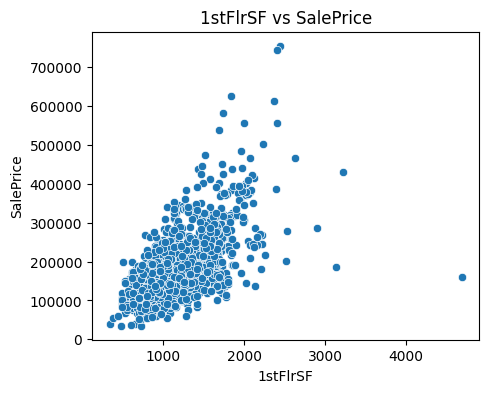

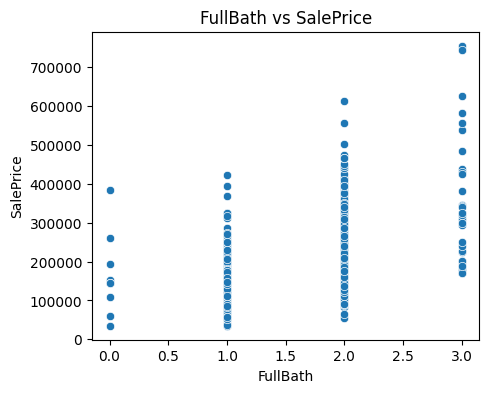

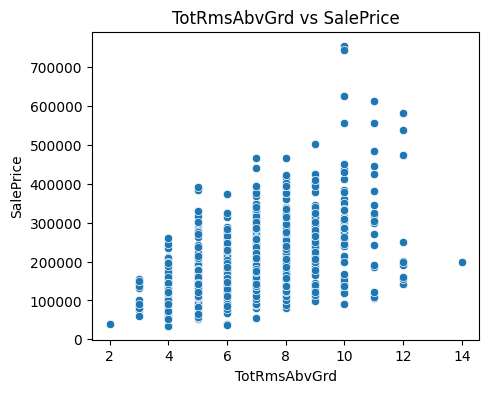

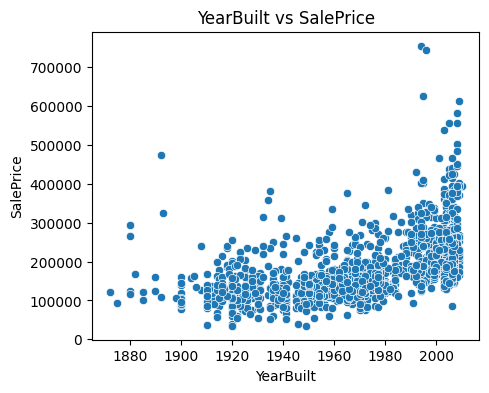

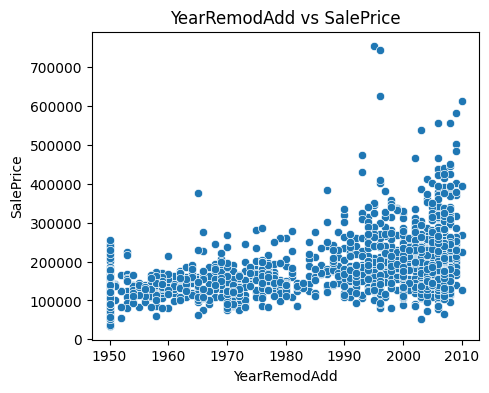

In [16]:
for col in top_num_features:
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=train_df[col], y=y)
    plt.title(f"{col} vs SalePrice")
    plt.show()

Categorical Features vs SalePrice.

In [17]:
cat_features = [
    'Neighborhood', 'HouseStyle', 'ExterQual',
    'KitchenQual', 'GarageType', 'SaleCondition'
]

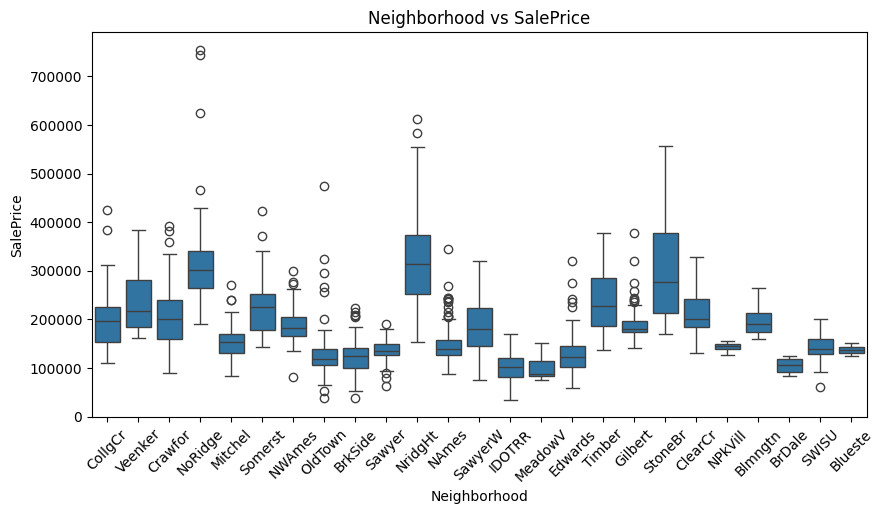

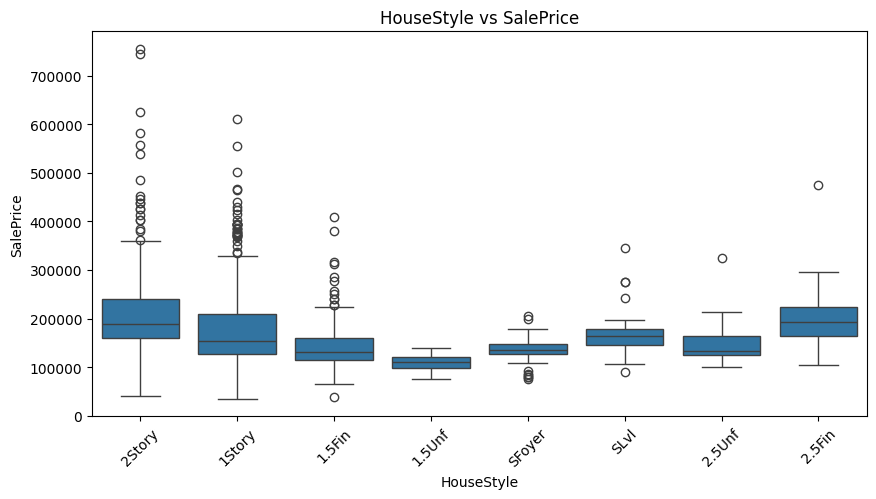

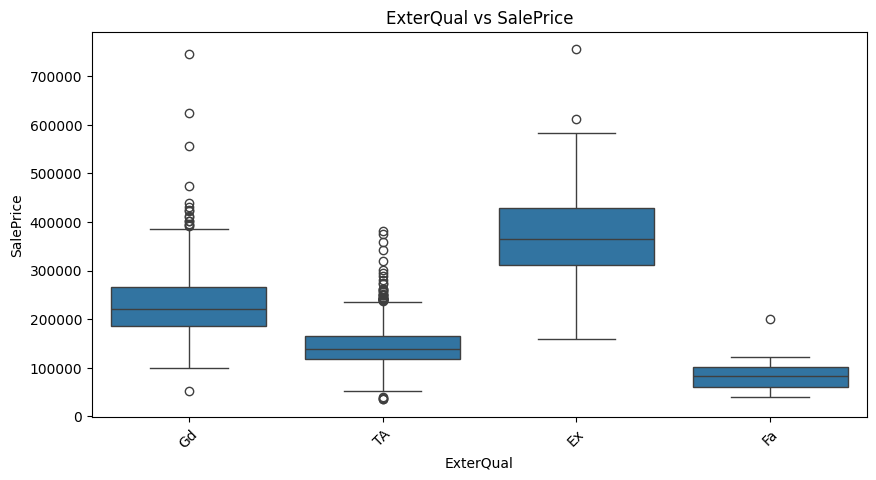

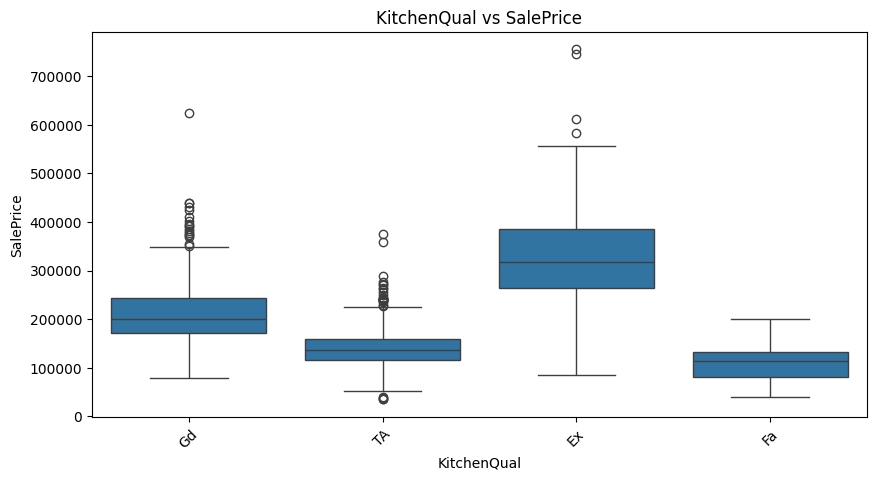

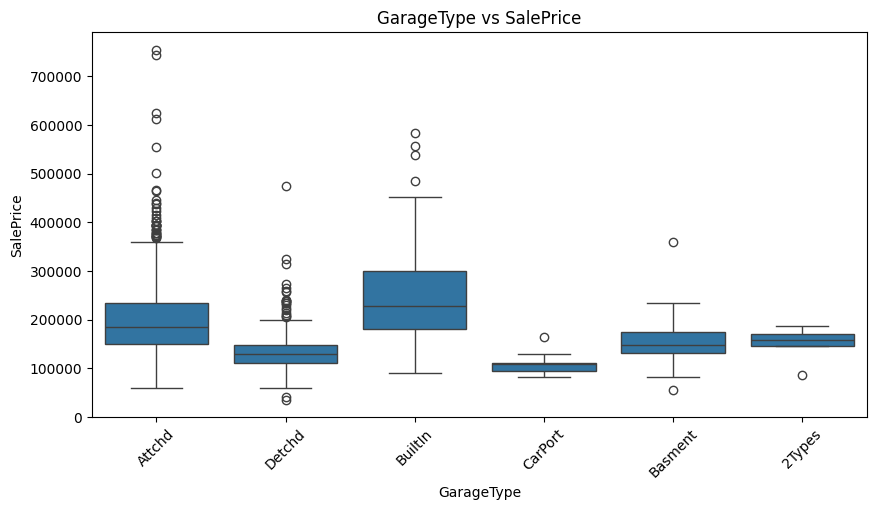

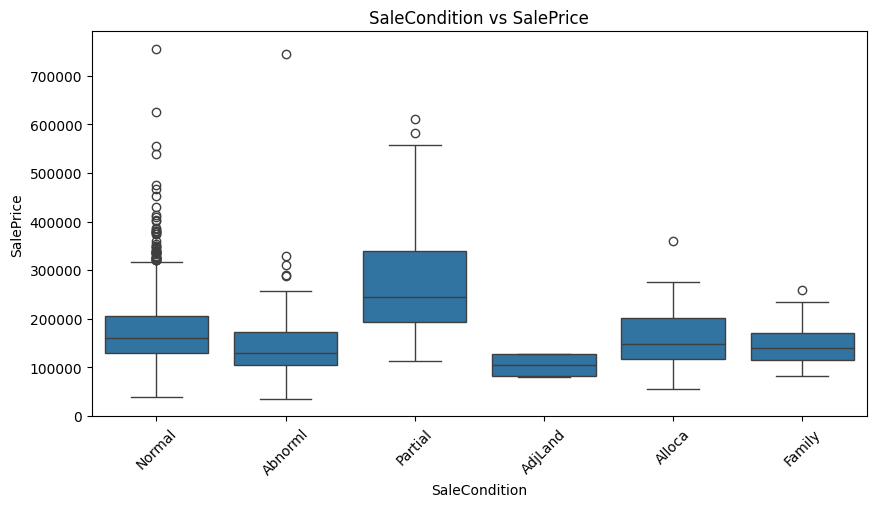

In [18]:
for col in cat_features:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=train_df[col], y=y)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs SalePrice")
    plt.show()


Skewness in Numerical Features

In [19]:
# Check Skewness

num_features = train_df.select_dtypes(include=['int64','float64'])
skewed = num_features.skew().sort_values(ascending=False)

skewed[skewed > 1]

,0
MiscVal,24.476794
PoolArea,14.828374
LotArea,12.207688
3SsnPorch,10.304342
LowQualFinSF,9.011341
KitchenAbvGr,4.488397
BsmtFinSF2,4.255261
ScreenPorch,4.122214
BsmtHalfBath,4.103403
EnclosedPorch,3.089872


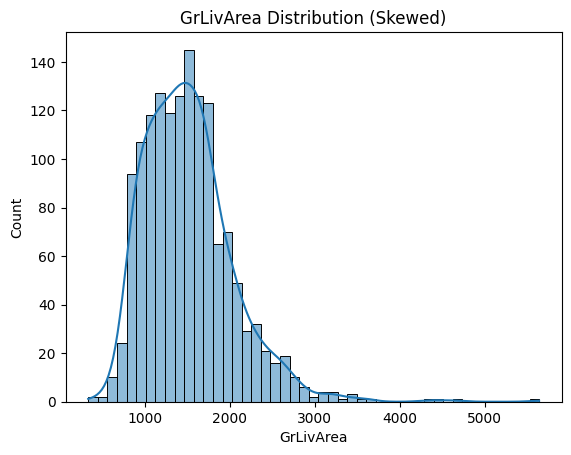

In [20]:
sns.histplot(train_df['GrLivArea'], kde=True)
plt.title("GrLivArea Distribution (Skewed)")
plt.show()

Highly skewed numerical features will be log-transformed during feature engineering.

Correlation Heatmap.

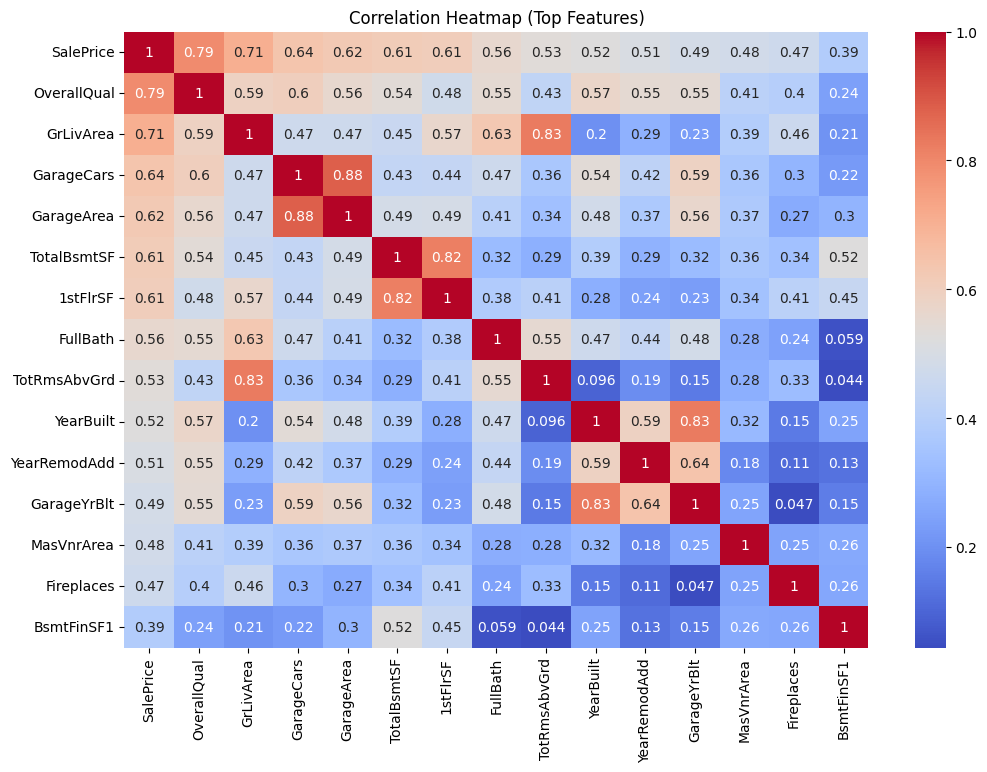

In [21]:
top_corr_features = corr[:15].index

plt.figure(figsize=(12,8))
sns.heatmap(train_df[top_corr_features].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Top Features)")
plt.show()

Outlier Dtection.
GrLivArea vs SalePrice

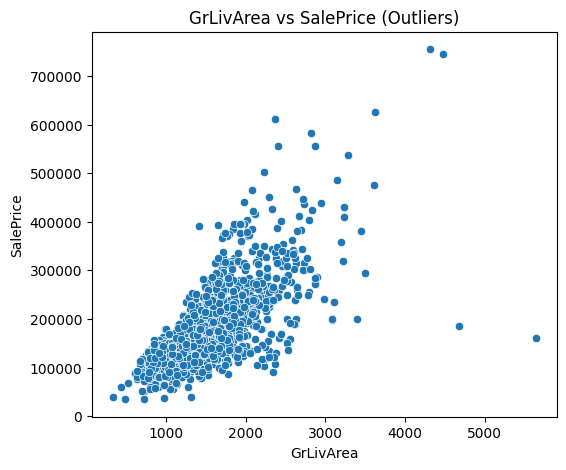

In [22]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=train_df['GrLivArea'], y=y)
plt.title("GrLivArea vs SalePrice (Outliers)")
plt.show()

Exploratory Data Analysis revealed that SalePrice is right-skewed with several high-value outliers, motivating log transformation of the target variable. Both numerical and categorical features significantly influence house prices, with overall quality, living area, and neighborhood being the strongest predictors. Several numerical variables exhibited high skewness, suggesting the need for transformation. Correlation analysis showed multicollinearity among size-related features, favoring tree-based models and regularized linear models.

### 6. Modelling.

1. Linear Model Regression.

In [23]:
# Import Libraries.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [24]:
# Train-Validation Split.

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
# Train the model.

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predictions.

y_val_pred = lr_model.predict(X_val)

In [27]:
# Evaluation metrics.

rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print("Linear Regression Results")
print("--------------------------")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Linear Regression Results
--------------------------
RMSE: 51405.0943
R² Score: 0.6555


A baseline Linear Regression model was trained using an 80–20 train-validation split with log-transformed SalePrice as the target. The model provides a reference performance benchmark for evaluating more complex models.

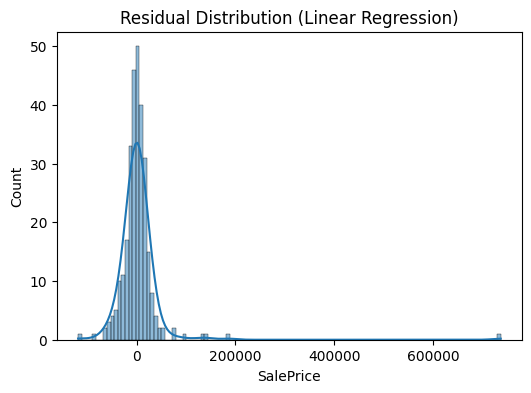

In [28]:
# Residual Analysis of linear regression.

import seaborn as sns
import matplotlib.pyplot as plt

residuals = y_val - y_val_pred

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution (Linear Regression)")
plt.show()

**Baseline Model Evaluation**

The Linear Regression model achieved an RMSE of 51,405 and an R² score of 0.66. While the model captured general trends, its performance is limited due to multicollinearity, skewed features, and nonlinear relationships present in the data. This result serves as a baseline for evaluating more advanced models.